In [90]:
import requests
from config import API_KEY
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib

In [91]:
url_gas_prices = f"http://api.eia.gov/series/?api_key={API_KEY}&series_id=PET.EMM_EPMRR_PTE_YORD_DPG.W"

In [92]:
df = pd.DataFrame(requests.get(url_gas_prices).json()['series'][0]['data'])

In [93]:
df.rename(columns = {0:"week", 1:"price"}, inplace = True)

In [94]:
df

,week,price
0,20201109,2.237
1,20201102,2.223
2,20201026,2.249
3,20201019,2.233
4,20201012,2.267
...,...,...
1062,20000703,1.786
1063,20000626,1.989
1064,20000619,2.108
1065,20000612,2.091


In [95]:
df['week']= pd.to_datetime(df['week'])
df

,week,price
0,2020-11-09,2.237
1,2020-11-02,2.223
2,2020-10-26,2.249
3,2020-10-19,2.233
4,2020-10-12,2.267
...,...,...
1062,2000-07-03,1.786
1063,2000-06-26,1.989
1064,2000-06-19,2.108
1065,2000-06-12,2.091


In [96]:
print(df['week'].min())
print(df['week'].max())

2000-06-05 00:00:00
2020-11-09 00:00:00


In [97]:
#set 'week' as index
gas_price = df.set_index('week')
gas_price.index

DatetimeIndex(['2020-11-09', '2020-11-02', '2020-10-26', '2020-10-19',
               '2020-10-12', '2020-10-05', '2020-09-28', '2020-09-21',
               '2020-09-14', '2020-09-07',
               ...
               '2000-08-07', '2000-07-31', '2000-07-24', '2000-07-17',
               '2000-07-10', '2000-07-03', '2000-06-26', '2000-06-19',
               '2000-06-12', '2000-06-05'],
              dtype='datetime64[ns]', name='week', length=1067, freq=None)

In [98]:
y = gas_price['price']

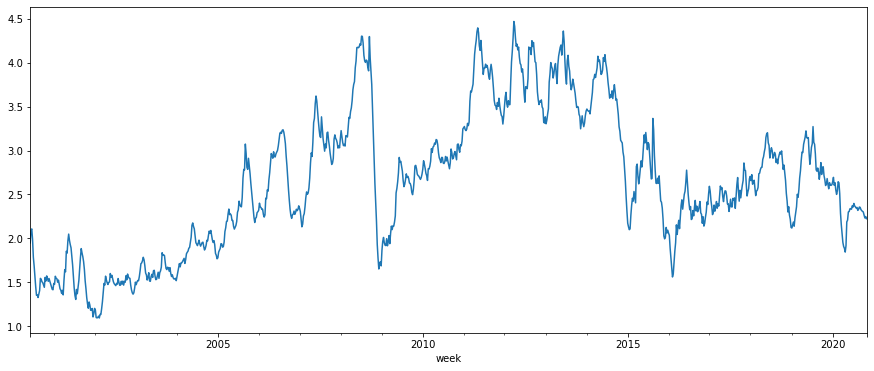

In [99]:
y.plot(figsize = (15, 6))
plt.show()

In [148]:
y = y.resample('MS').mean()
y['2018':]

week
2018-01-01    2.66880
2018-02-01    2.56450
2018-03-01    2.65200
2018-04-01    2.84640
2018-05-01    3.09025
2018-06-01    3.06650
2018-07-01    2.97360
2018-08-01    2.92525
2018-09-01    2.92650
2018-10-01    2.89280
2018-11-01    2.58775
2018-12-01    2.25420
2019-01-01    2.14875
2019-02-01    2.34725
2019-03-01    2.62050
2019-04-01    3.00700
2019-05-01    3.16650
2019-06-01    2.97300
2019-07-01    3.11040
2019-08-01    2.82675
2019-09-01    2.75280
2019-10-01    2.75250
2019-11-01    2.62900
2019-12-01    2.60400
2020-01-01    2.64450
2020-02-01    2.55975
2020-03-01    2.32740
2020-04-01    1.89850
2020-05-01    2.15375
2020-06-01    2.33740
2020-07-01    2.37100
2020-08-01    2.34080
2020-09-01    2.32700
2020-10-01    2.26250
2020-11-01    2.23000
Freq: MS, Name: price, dtype: float64

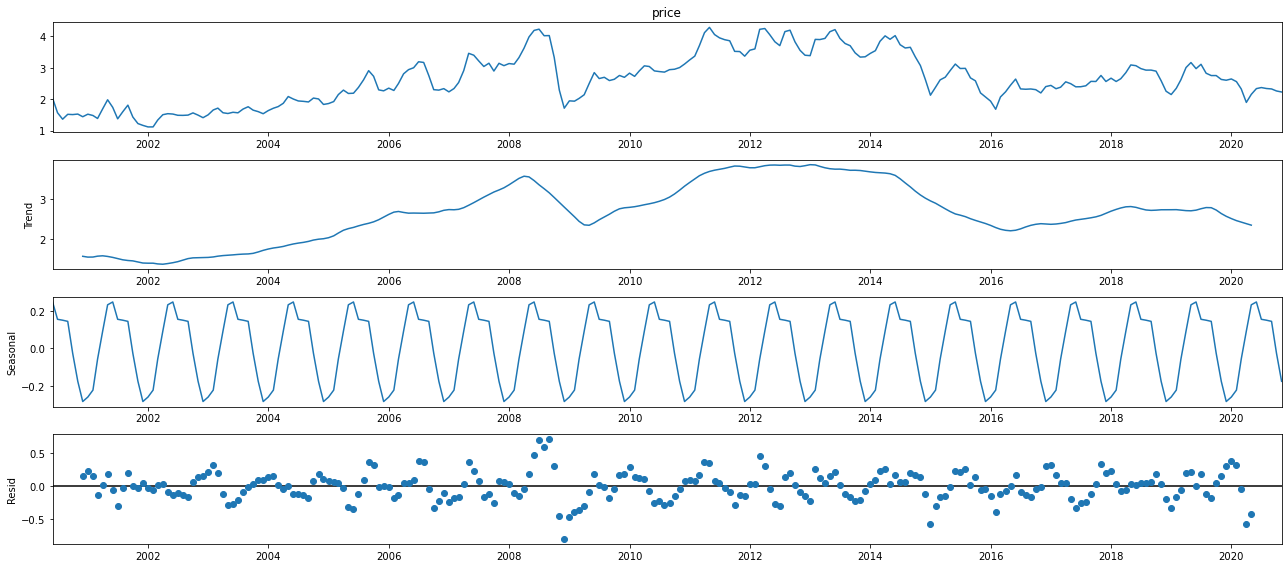

In [149]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model = 'additive')
fig = decomposition.plot()
plt.show()

In [150]:
# set the typical ranges for p, d, q
p = d = q = range(0, 2)

#take all possible combination for p, d and q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [109]:
# Using Grid Search find the optimal set of parameters that yields the best performance
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 
            result = mod.fit()   
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1198.3868370691762
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:944.0381668914085
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:407.48476441525065
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:406.972417835084
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:458.70908804655255
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:458.8148866763726
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:407.59789086367323
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:401.03291063384347
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:882.7159853908643
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:647.8718501710239
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:184.91002248710703
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:177.78862191259753
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:220.09839451063579
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:214.54598653912743
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:179.79845212483355
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:173.5065083496118
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-62.461635854980685
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-68.4852536975555

In [151]:
#Fitting the ARIMA model using above optimal combination of p, d, q (optimal means combination at which we got lowest AIC score)
# here it's ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:-115.17368416177202
model = sm.tsa.statespace.SARIMAX(y, order = (1, 1, 1),
                                  seasonal_order = (1, 0, 1, 12)
                                 )
result = model.fit()
print(result.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0477      0.187     -0.255      0.798      -0.414       0.318
ma.L1          0.3606      0.181      1.990      0.047       0.006       0.716
ar.S.L12       0.9996      0.036     27.885      0.000       0.929       1.070
ma.S.L12      -0.9866      0.559     -1.765      0.078      -2.082       0.109
sigma2         0.0327      0.016      2.003      0.045       0.001       0.065


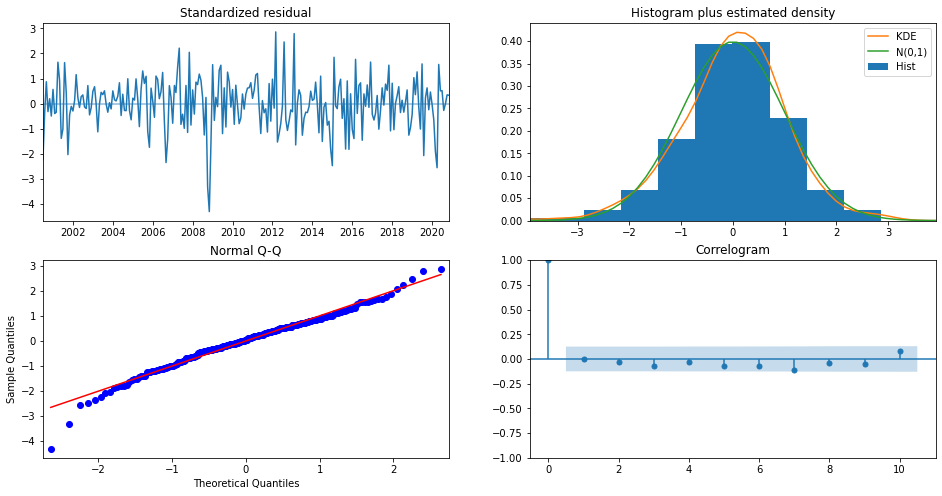

In [125]:
#run model diagnostic to investigate any unusual behavior
result.plot_diagnostics(figsize = (16, 8))
plt.show()

In [136]:
prediction = result.get_prediction(start = pd.to_datetime('2018-01-01'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

,lower price,upper price
week,,
2018-01-01,2.158600,2.879703
2018-02-01,2.395355,3.116458
2018-03-01,2.291690,3.012793
2018-04-01,2.428117,3.149220
2018-05-01,2.605530,3.326633
2018-06-01,2.771603,3.492637
2018-07-01,2.588322,3.308807
2018-08-01,2.627705,3.348138
2018-09-01,2.553253,3.273680


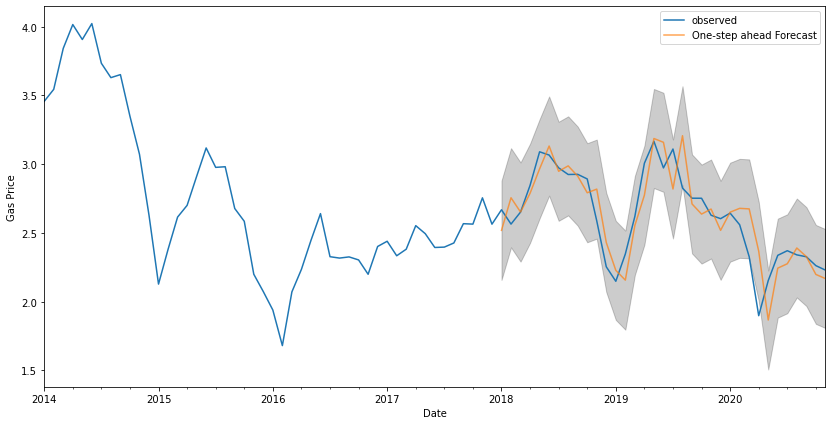

In [137]:
#Visualize the forecasting
ax = y['2014':].plot(label = 'observed')
prediction.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = 0.7, figsize = (14, 7))
ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel("Date")
ax.set_ylabel('Gas Price')
plt.legend()
plt.show()

In [114]:
prediction2 = result.get_prediction(start = pd.to_datetime('2018-01-01'), dynamic = True)
prediction_ci2 = prediction.conf_int()
prediction_ci2

,lower price,upper price
week,,
2018-01-01,2.158600,2.879703
2018-02-01,2.395355,3.116458
2018-03-01,2.291690,3.012793
2018-04-01,2.428117,3.149220
2018-05-01,2.605530,3.326633
2018-06-01,2.771603,3.492637
2018-07-01,2.588322,3.308807
2018-08-01,2.627705,3.348138
2018-09-01,2.553253,3.273680


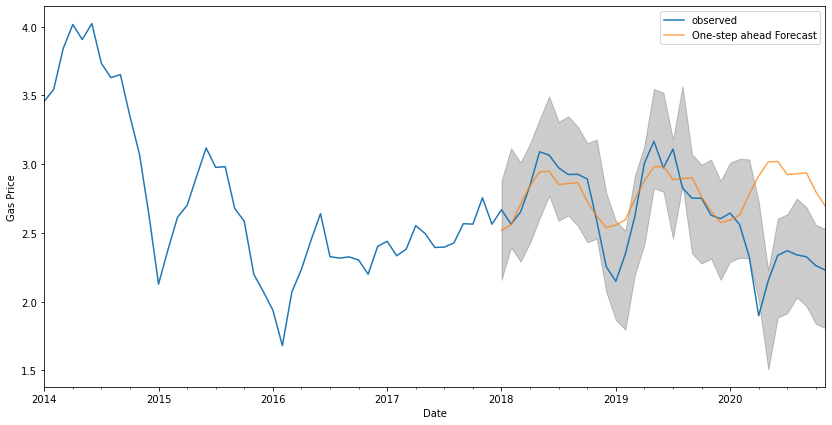

In [138]:
#Visualize the forecasting
ax = y['2014':].plot(label = 'observed')
prediction2.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = 0.7, figsize = (14, 7))
ax.fill_between(prediction_ci2.index, prediction_ci2.iloc[:, 0], prediction_ci2.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel("Date")
ax.set_ylabel('Gas Price')
plt.legend()
plt.show()

In [139]:
# Squared Mean Error(SME) and Root Mean Squared Error(RMSE) for get_prediction, dynamic= False
y_hat = prediction.predicted_mean
y_truth = y['2018-01-01':]

mse = ((y_hat - y_truth) ** 2).mean()
rmse = np.sqrt(mse)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Mean Squared Error of our forecasts is 0.03
The Root Mean Squared Error of our forecasts is 0.17


In [140]:
# Squared Mean Error(SME) and Root Mean Squared Error(RMSE) for get_prediction, dynamic= True
y_hat = prediction2.predicted_mean
y_truth = y['2017-01-01':]

mse = ((y_hat - y_truth) ** 2).mean()
rmse = np.sqrt(mse)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Mean Squared Error of our forecasts is 0.13
The Root Mean Squared Error of our forecasts is 0.36
